Computation of model of resistor

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [53]:
filename1="series1_2 sensors_12 cm"
filename2="series2_2 sensors_8 cm"
filename3="series3_2 sensors_10 cm"
filename4="series4_1 sensor_10 cm"
filename5="series5_2 sensors_20 cm"
filename6="series6_2 sensors_15 cm"
filenames = [filename1, filename2, filename3, filename4, filename5, filename6]
distance = [12, 8, 10, 10, 20, 15]
nb_sensors = 3

In [102]:
file_nb = 4
nb_samples_derivative = 120
time_series = np.load(filenames[file_nb] + "./data.npy", allow_pickle = True)
time_range = np.load(filenames[file_nb] + "./time_range.npy", allow_pickle = True)
derivative = np.zeros_like(time_series[:nb_samples_derivative, :])
# time_range.shape
# len(range(1, time_range.shape[0]))
# range(1,time_range.shape[0])

file #  0  sensor #  0


AttributeError: module 'numpy' has no attribute 'range'

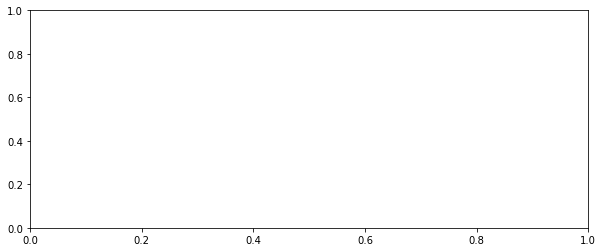

In [130]:
ss = np.zeros(nb_sensors) # steady state
fontsize=20
colors = ['b','g','k','y','m','c']
fig, ax = plt.subplots(1,1)
fig.set_figwidth(10)

for file in range(len(filenames)):
    
    #fetch data
    
    nb_samples_derivative = 120
    time_series = np.load(filenames[file] + "./data.npy", allow_pickle = True)
    time_range = np.load(filenames[file] + "./time_range.npy", allow_pickle = True)
    dt = time_range[1]
    derivative = np.zeros_like(time_series[:nb_samples_derivative, :])
    
    # compute derivative
    window=16
    for sensor in range(nb_sensors):
        derivative[window:nb_samples_derivative, sensor] = (time_series[window:nb_samples_derivative,sensor] - 
                                       time_series[:nb_samples_derivative-window, sensor]) / (time_range[window:nb_samples_derivative] - time_range[:nb_samples_derivative-window])
        # compute steady state
#         ss[sensor] = np.mean(time_series[-100:, sensor])
        ss[sensor] = np.max(time_series[-100:, sensor])
        
    #align derivatives at t = 0
    t_0 = 0
    done = False
    for sample in range(nb_samples_derivative):
        for sensor in range(nb_sensors):
            if derivative[sample, sensor] > 0:
                done = True
            else: 
                t_0 = sample
            if done:
                break
        if done:
                break
    
    # plot derivative
    for sensor in range(0,nb_sensors):
        print("file # ", file, " sensor # ", sensor)
        time_vector = np.range(0, derivative[t_0:nb_samples_derivative, sensor].shape[0], dt)
        
        ax.plot(time_vector, derivative[t_0:nb_samples_derivative, sensor], 
                label="s.s. " + str(ss[sensor]) + " C", color = colors[file])
        
        
#         ax.plot(time_range[t_0:nb_samples_derivative], derivative[t_0:nb_samples_derivative, sensor], 
#                 label="s.s. " + str(ss[sensor]) + " C", color = colors[file])
        
        
ax.set_title("Derivative of temperature (dT / dt)", fontsize=fontsize)
ax.legend(loc='upper right')
ax.set_xlabel("time (s)", fontsize=fontsize-4)
ax.set_ylabel("Temperature (C)", fontsize=fontsize-4)
ax.set_ylim([0,12])
ax.set_xlim([1,10.5])
plt.show
t_0

<function matplotlib.pyplot.show(close=None, block=None)>

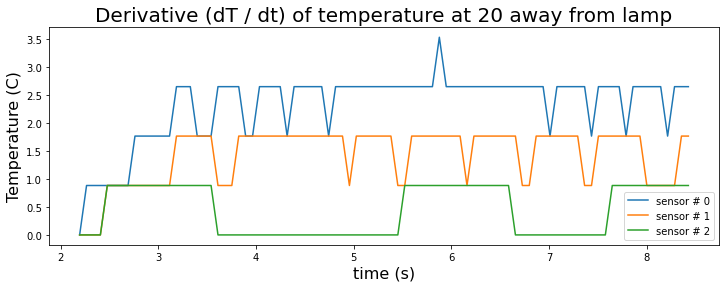

In [108]:
fontsize=20
fig, ax = plt.subplots(1,1)
fig.set_figwidth(12)

for sensor in range(0,nb_sensors):
    ax.plot(time_range[t_0:nb_samples_derivative], derivative[t_0:nb_samples_derivative, sensor], label="sensor # " + str(sensor))
    
ax.set_title("Derivative (dT / dt) of temperature at " + str(distance[file_nb]) + " away from lamp", fontsize=fontsize)
ax.legend(loc='lower right')
ax.set_xlabel("time (s)", fontsize=fontsize-4)
ax.set_ylabel("Temperature (C)", fontsize=fontsize-4)
plt.show

steady state :  33.0
steady state :  92.06
steady state :  82.46


<function matplotlib.pyplot.show(close=None, block=None)>

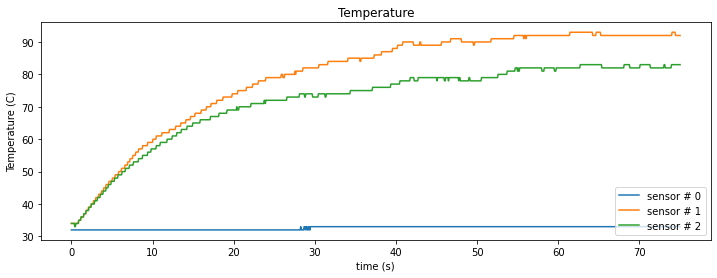

In [113]:
file_nb = 0
nb_samples_derivative = 120
time_series = np.load(filenames[file_nb] + "./data.npy", allow_pickle = True)
time_range = np.load(filenames[file_nb] + "./time_range.npy", allow_pickle = True)

fig, ax = plt.subplots(1,1)
fig.set_figwidth(12)

for sensor in range(0,nb_sensors):
    ax.plot(time_range[:], time_series[:, sensor], label="sensor # " + str(sensor))
    print("steady state : ", np.mean(time_series[-100:, sensor]))
    
ax.set_title("Temperature")
ax.legend(loc='lower right')
ax.set_xlabel("time (s)")
ax.set_ylabel("Temperature (C)")
plt.show


In [111]:
np.mean(time_series)

61.35861423220974

<function matplotlib.pyplot.show(close=None, block=None)>

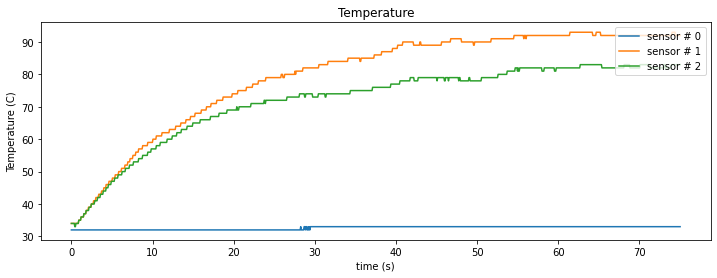

In [26]:
start=1000
time_range[:-500]

array([0.00000000e+00, 5.00082107e-03, 1.00016421e-02, ...,
       4.74927977e+01, 4.74977985e+01, 4.75027993e+01])

In [23]:
time_series[:5]

array([[31., 31., 31.],
       [31., 31., 31.],
       [31., 31., 31.],
       [31., 31., 31.],
       [31., 31., 31.]])